In [1]:
import tensorflow as tf

C:\Users\NILESH\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/" , one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape , mnist.train.labels.shape

((55000, 784), (55000, 10))

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.validation.images.shape

(5000, 784)

In [ ]:
#to test
#mnist.train.labels[0]

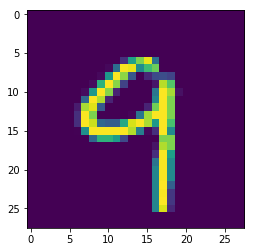

In [9]:
#plotting image to test whether or not it is loaded

import numpy as np
import matplotlib.pyplot as plt
plt.imshow(np.array(mnist.train.images[8].reshape((28,28)) , dtype = 'float'))
plt.show()

In [10]:
#setting two hidden layers for neural network
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1' : tf.Variable(tf.random_normal([n_input , n_hidden_1])) , 
    'h2' : tf.Variable(tf.random_normal([n_hidden_1 , n_hidden_2])) ,
    'out' : tf.Variable(tf.random_normal([n_hidden_2 , n_classes]))
}

biases = {
    'h1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes]))

}

In [11]:
#implementing forward propagation for tf
def forward_propagation(x , weights , biases):
    in_layer1 = tf.add(tf.matmul(x , weights['h1']) , biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul( out_layer1 , weights['h2']) , biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul( out_layer2 , weights['out']) , biases['out'])
    return output

In [12]:
#x and y for input and output for neural network
x = tf.placeholder('float' , shape = (None , n_input))
y = tf.placeholder(tf.int32 , shape = (None , n_classes))
pred = forward_propagation(x , weights , biases)

In [14]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred , labels = y))

In [15]:
#optimizer for optimizing cost
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [16]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
#printing cost at each steap -- significant loss observed
batch_size = 550
for iter in range(25):
    total_cost = 0
    num_iter = int(mnist.train.num_examples / batch_size)
    for j in range(num_iter):
        batch_x , batch_y = mnist.train.next_batch(batch_size)
        c , _ = sess.run([cost , optimize] , feed_dict = {x:batch_x , y:batch_y})
        total_cost += c
    print(total_cost)

11951.94555091858
1857.2615604400635
1022.1354846954346
634.8638362884521
393.9521581530571
261.9966344833374
175.79089534282684
119.43341319262981
79.51120249554515
56.94163252739236
47.94126129998097
51.946026995393765
45.4136442347517
46.64851892428305
53.09035218076315
50.69275537215435
49.48537573032081
52.984730213878805
56.530734547646716
52.92423402547108
65.99263346142834
55.99249715532642
54.58253271813737
52.80592821490427
43.38118158932775


In [18]:
#predicting values
predictions = tf.argmax(pred , 1)
correct_labels = tf.argmax(y , 1)
correct_predictions = tf.equal(predictions , correct_labels)
predictions , correct_predictions = sess.run([predictions , correct_predictions] , feed_dict = {x : mnist.test.images , 
                                                                                               y: mnist.test.labels})
correct_predictions.sum()

9605

In [20]:
#printing accuracy 
print('accuracy :' , correct_predictions.sum() / len(predictions))

accuracy : 0.9605
